# HW Set 7 - Relax!  Laplace and Poisson Equations
## Due Oct 27, 2015

### Name:   James O. Thomas

#### Note: If a problem asks you to work things out for different initial conditions or timesteps, please first do your first choice in one cell, then copy your code with the new inputs into a new cell, etc.  Try to end up with a notebook that would be a complete solution if printed out.
---


In [1]:
%matplotlib inline

**Problem 1: Infinite Metallic Prism (also the name of my favorite band from the 80s)**

The figure below represents a cross section through a metallic prism.  The outer surface is held at $V = 0$.  The inner surface is held at $V=1$.  Solve for the potential $V(x,y)$ in the space between these two conductors using the relaxation method.  Assume that the inner surface is $3\times3$ and the outer surface is $15\times15$ computational cells (but if you'd like to choose something different, that's also fine).   Plot the result as a contour plot and a surface plot.  Finally, plot the electric field using a quiver plot (see recent handout).

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/10/artwork.png" />

starting values
[[ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0]
 [ 0.0  0.0  0.0  0.0  0

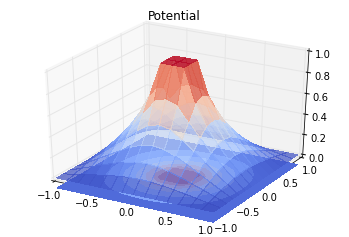

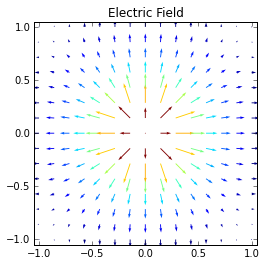

In [2]:
# Solution to proble 1
'''
Modified version of:
Laplace's Equation
Linear Potential in a box
by Dr. Wood

October 2015
James O. Thomas
'''

import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
np.set_printoptions(formatter={'float': '{: 0.1f}'.format})

def relax(V):
    return (V[i-1,j]+V[i+1,j]+V[i,j-1]+V[i,j+1])/4.0

# initialize
tolerance = 1.0e-6
delta = 1.0
nx = 15
ny = 15

# boundary conditions
V = np.zeros([nx,ny])
# outer surface
V[:,0] = 0.0
V[:,-1] = 0.0
V[0,:] = 0.0
V[ny-1,:] = 0.0
# inner surface
V[6:9,6:9] = 1.0

print("starting values")
print(V)

# iterate until all points have reached their 'best' values
keep = [6,7,8]
iteration = 0
while delta > tolerance:
    delta = 0
    for i in range(1,nx-1):  # dont use the end values
        for j in range(1,ny-1):
            if i in keep and j in keep:
                V[i,j] = V[i,j] # how do i make it calculate the interior points
            else:
                newVij = relax(V)
                delta0 = np.abs(newVij - V[i,j])
                if delta0 > delta:
                    delta = delta0
                V[i,j] = newVij
    iteration += 1

# print the final values
print('final ')
print(V)

# plot as a contour plot
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
x,y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_title('Potential')
surf = ax.plot_surface(x,y,V, rstride = 1, cstride = 1, alpha = 0.7, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
cset = ax.contourf(x,y,V, zdir = 'V', offset = -0.1, cmap = cm.coolwarm)
plt.show

# Now calculate E field
Ey, Ex = np.gradient(-V)
fig, ax = plt.subplots()
ax.quiver(x,y,Ex,Ey,V)
ax.set(aspect = 1, title = 'Electric Field')
plt.axis([-1.05,1.05,-1.05,1.05])
plt.show()


The potential and field behave as expected. They match the boundary conditions and transition smoothly in the interior points. Also, I listened to some Prism songs while doing this homework due to your comment. Not bad. Not bad at all. 

--- 

**Problem 2: Capacitor Simulation**

Investigate how the magnitude of the fringing field of a capacitor -- that is, the electric field outside the central region of the capacitor in the figure below -- varies as a function of the plate separation.  Take this to be a 2D problem, so this is again a cross section.

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/10/capacitorinbox.png" />





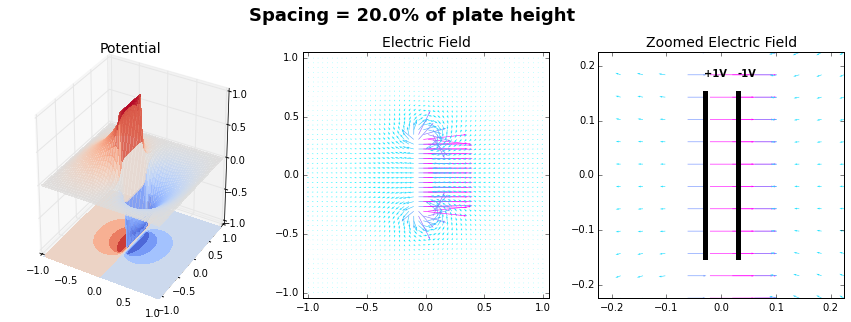

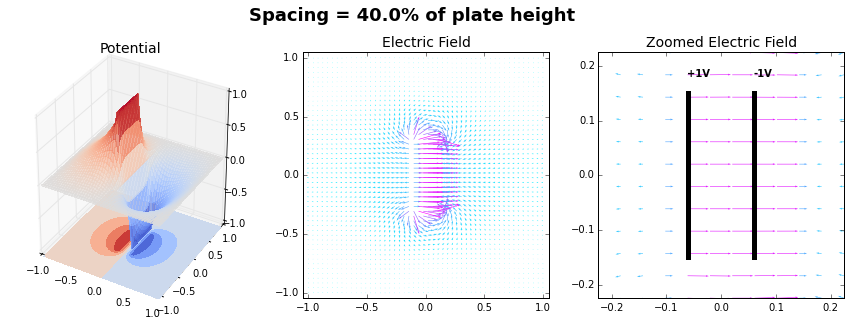

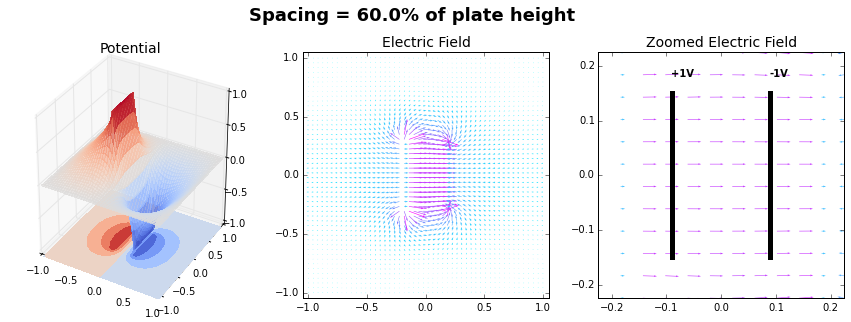

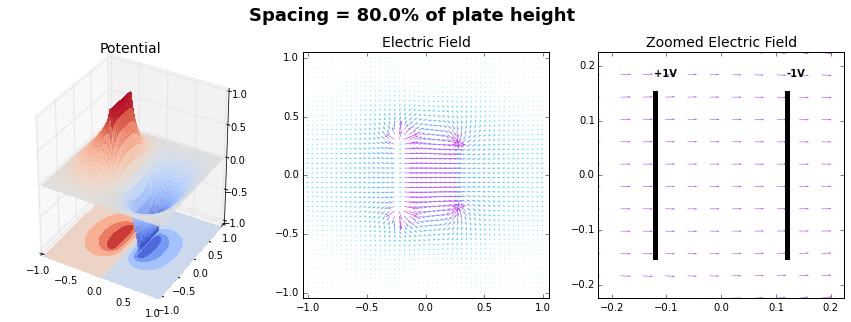

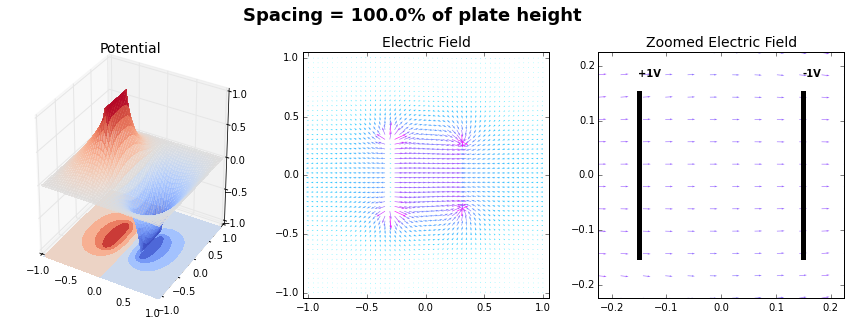

In [3]:
# Solution to problem 2
'''
Modified version of:
Laplace's Equation
Linear Potential in a box
by Dr. Wood

October 2015
James O. Thomas
'''

import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
np.set_printoptions(formatter={'float': '{: 0.1f}'.format})

def relax(V):
    return (V[i-1,j]+V[i+1,j]+V[i,j-1]+V[i,j+1])/4.0

# initialize
n = 50
nx = n    # number of points
ny = n
plate_height = .3   # plate height (%)
spacing = np.array([0.2, 0.4, 0.6, 0.8, 1.0])
spacing = spacing*plate_height

for s in spacing:
    tolerance = 1.0e-6
    delta = 1.0
    # boundary conditions
    V = np.zeros([nx,ny])
    # outer surface
    V[:,0] = 0.0
    V[:,-1] = 0.0
    V[0,:] = 0.0
    V[ny-1,:] = 0.0
    
    l_plate = int(nx*(1-s)/2)    # location of left plate (+1)
    r_plate = int(nx*(1+s)/2)    # location of right plate(-1)
    
    p_top = int(ny*(1+plate_height)/2)   # end points for the plates
    p_bottom = int(ny*(1-plate_height)/2)

    # capacitor plates
    V[p_bottom:p_top+1, l_plate] = 1.0
    V[p_bottom:p_top+1, r_plate] = -1.0

    # iterate until all points have reached their 'best' values
    keep = np.arange(p_bottom,p_top+1, 1, dtype = int)
    #iteration = 0
    while delta > tolerance:
        delta = 0
        for i in range(1,nx-1):  # dont use the end values
            for j in range(1,ny-1):
                if i in keep and j in [l_plate, r_plate]:
                    V[i,j] = V[i,j]
                else:
                    newVij = relax(V)
                    delta0 = np.abs(newVij - V[i,j])
                    if delta0 > delta:
                        delta = delta0
                    V[i,j] = newVij
        #iteration += 1

    # plot as a contour plot
    x = np.linspace(-1,1,nx)
    y = np.linspace(-1,1,ny)
    x,y = np.meshgrid(x,y)

    fig = plt.figure(figsize = (15,5))
    plt.suptitle('Spacing = '+str(round(s/plate_height*100,2))+'% of plate height', size = 18, fontweight = 'bold')
    
    ax = fig.add_subplot(131, projection = '3d')
    ax.set_title('Potential', size = 14)
    surf = ax.plot_surface(x,y,V, rstride = 1, cstride = 1, alpha = 0.7, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
    cset = ax.contourf(x,y,V, zdir = 'V', offset = -1.1, cmap = cm.coolwarm)
    plt.show
    
    # Now calculate E field
    Ey, Ex = np.gradient(-V)
    mag = np.sqrt(Ey**2 + Ex**2)  # color the E field according to the magnitude of E not V
    ax1 = plt.subplot(1,3,2)
    q1 = ax1.quiver(x,y,Ex, Ey, mag, cmap = cm.cool)
    ax1.set(aspect = 1, title = 'Electric Field')
    ax1.set_title('Electric Field', size = 14)
    ax1.set_xlim(-1.05, 1.05)
    ax1.set_ylim(-1.05, 1.05)
    
    # zoom in on area of interest
    ax2 = plt.subplot(1,3,3)
    q2 = ax2.quiver(x,y,Ex,Ey,mag, cmap = cm.cool)
    ax2.set(aspect = 1)
    ax2.set_title('Zoomed Electric Field', size = 14)
    pltlim = max([s,plate_height])
    pltedge = 1.5*pltlim/2
    ax2.set_ylim(-pltedge, pltedge)
    ax2.set_xlim(-pltedge, pltedge)
    ax2.plot([-s/2, -s/2], [-plate_height/2, plate_height/2], 'k', linewidth = 5)
    ax2.plot([s/2, s/2], [-plate_height/2, plate_height/2], 'k', linewidth = 5)
    ax2.text(-s/2, plate_height/2*1.2, '+1V', fontweight = 'bold')
    ax2.text(s/2, plate_height/2*1.2, '-1V', fontweight = 'bold')
    plt.show()

We can see that the field at the interior points of the plates is remarkably stable regardless of the spacing (atleast for the spacings I used). The electric field has a uniform magnitude and direction for most of the interior points. However, there is some fringing that can be seen near the edges. As the spacing increases, the fringes becomes more pronounced. 

---
**Problem 3: The Potential and Field of a Point Charge**

As discussed in class, the relaxation routine when a charge is included in the volume can be written as

    def relax(V):
        return (V[i-1,j,k] + V[i+1,j,k] + V[i,j-1,k] + V[i,j+1,k] \
               + V[i,j,k-1] + V[i,j,k+1]) / 6.0 + rho(i,j,k) * dx**2 / 6

If we center our box on (0,0,0) and put our point charge there, then $\rho(0,0,0) = q/dx^3$, and it is typical to take $q/\epsilon_0=1$. 

Write a code that simulates the potential and field of a point charge.  Explore your answer as a function of the size of the box, and compare with the analytical solutions.  Plot your equipotential surfaces as a contour plot, and also make a surface plot of the potential.  Make a quiver plot of the electric field around the point charge. A 2D plot of the E field in the x-y plane is sufficient, which you can accomplish by slicing.  For example, if you have a 3D array V[n,n,n] (note n should be odd), then you'd get the x-y plane with the command

    V0 = V[:,:,int(n/2)]
    
Now V0 is a 2D array.

Note: For this, you may want to relax your tolerance for conversion to 1.e-3, especially if you use larger n.


iterations =  226


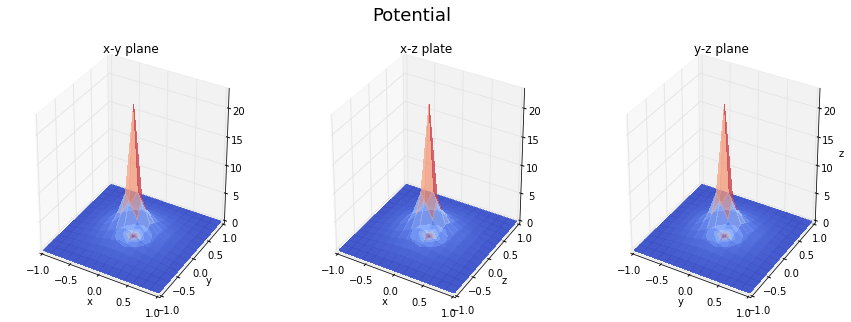

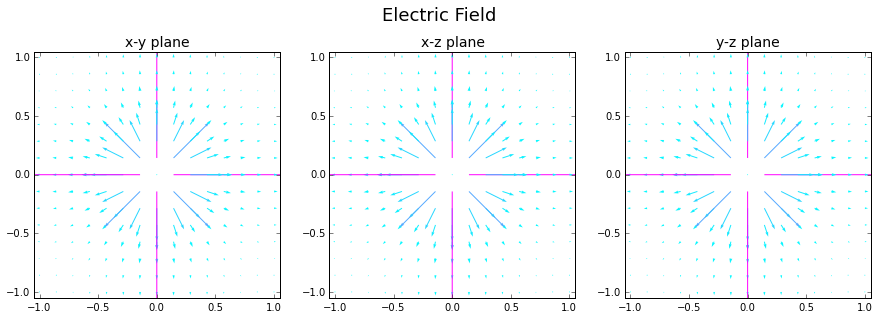

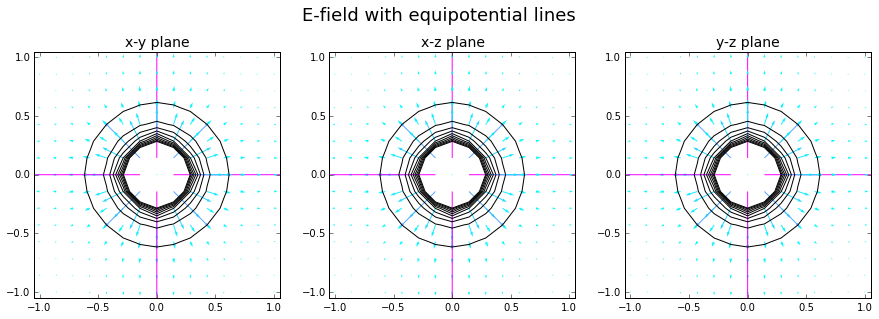

In [51]:
# Solution to problem 3
'''
Modified version of:
Laplace's Equation
Linear Potential in a box
by Dr. Wood

October 2015
James O. Thomas
'''

import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
np.set_printoptions(formatter={'float': '{: 0.1f}'.format})

def relax(V):
    # modified for point charge
    return (V[i-1,j,k]+V[i+1,j,k]+V[i,j-1,k]+V[i,j+1,k]+V[i,j,k-1]+V[i,j,k+1])/6.0 + rho[i,j,k]*dx**2/6

# initialize
tolerance = 1.0e-6
delta = 1.0
n = 15
boxsize = 1
dx = (2*boxsize)/n

# initialize
V = np.zeros([n,n,n])
rho = np.zeros([n,n,n])
# outer surface
V[:,:,0] = 0.0
V[:,:,-1] = 0.0
V[:,0,:] = 0.0
V[:,-1,:] = 0.0
V[0,:,:] = 0.0
V[-1,:,:] = 0.0

center = int(n/2)
rho[center,center,center] = 1/dx**3*4*np.pi


# iterate until all points have reached their 'best' values
iteration = 0
while delta > tolerance:
    delta = 0
    for i in range(1,n-1):          # x
        for j in range(1,n-1):      # y
            for k in range(1,n-1):  # z 
                newVijk = relax(V)
                delta0 = np.abs(newVijk - V[i,j,k])
                if delta0 > delta:
                    delta = delta0
                V[i,j,k] = newVijk
    iteration += 1
    
print('iterations = ', iteration)

# Now we just do a bunch of plotting, all the work is done

x = np.linspace(-boxsize,boxsize,n)
y = np.linspace(-boxsize,boxsize,n)
z = np.linspace(-boxsize,boxsize,n)

fig = plt.figure(figsize = (15,5))
plt.suptitle('Potential', size =18)

Vxy = V[:,:,center]
X,Y = np.meshgrid(x,y)
ax1 = fig.add_subplot(131, projection = '3d')
ax1.set_title('x-y plane')
surf1 = ax1.plot_surface(X,Y,Vxy, rstride=1, cstride=1, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cset1 = ax1.contourf(X,Y,Vxy, zdir = 'Vxy', offset = -0.1, cmap = cm.coolwarm)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

Vxz = V[:,center,:]
X,Z = np.meshgrid(x,z)
ax2 = fig.add_subplot(1,3,2, projection = '3d')
ax2.set_title('x-z plate')
surf2 = ax2.plot_surface(X,Z,Vxz, rstride=1, cstride=1, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cset2 = ax2.contourf(X,Z,Vxz, zdir = 'Vxz', offset = -0.1, cmap = cm.coolwarm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')

Vyz = V[center,:,:]
Y,Z = np.meshgrid(y,z)
ax3 = fig.add_subplot(1,3,3, projection = '3d')
ax3.set_title('y-z plane')
surf3 = ax3.plot_surface(Y,Z,Vyz, rstride=1, cstride=1, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cset3 = ax3.contourf(Y,Z,Vyz, zdir = 'Vyz', offset = -0.1, cmap = cm.coolwarm)
ax3.set_xlabel('y')
ax3.set_zlabel('z')

plt.show()


# Now calculate E field
plt.figure(figsize = (15,5))
plt.suptitle('Electric Field', size = 18)

X,Y = np.meshgrid(x,y)
Ey, Ex = np.gradient(-Vxy)
mag = np.sqrt(Ey**2 + Ex**2)  # color the E field according to the magnitude of E not V
ax1 = plt.subplot(1,3,1)
q1 = ax1.quiver(X,Y,Ex, Ey, mag, cmap = cm.cool)
ax1.set(aspect = 1)
ax1.set_title('x-y plane', size = 14)
ax1.set_xlim(-1.05, 1.05)
ax1.set_ylim(-1.05, 1.05)

X,Z = np.meshgrid(x,y)
Ez, Ex = np.gradient(-Vxz)
mag = np.sqrt(Ez**2 + Ex**2)  # color the E field according to the magnitude of E not V
ax2 = plt.subplot(1,3,2)
q2 = ax2.quiver(X,Z,Ex, Ez, mag, cmap = cm.cool)
ax2.set(aspect = 1)
ax2.set_title('x-z plane', size = 14)
ax2.set_xlim(-1.05, 1.05)
ax2.set_ylim(-1.05, 1.05)

Y,Z = np.meshgrid(y,z)
Ez, Ey = np.gradient(-Vyz)
mag = np.sqrt(Ez**2 + Ey**2)  # color the E field according to the magnitude of E not V
ax3 = plt.subplot(1,3,3)
q3 = ax3.quiver(Y,Z,Ey, Ez, mag, cmap = cm.cool)
ax3.set(aspect = 1)
ax3.set_title('y-z plane', size = 14)
ax3.set_xlim(-1.05, 1.05)
ax3.set_ylim(-1.05, 1.05)

plt.show()

# now plot equipotenital lines with the E field
plt.figure(figsize = (15,5))
plt.suptitle('E-field with equipotential lines', size = 18)

X,Y = np.meshgrid(x,y)
Ey, Ex = np.gradient(-Vxy)
mag = np.sqrt(Ey**2 + Ex**2)  # color the E field according to the magnitude of E not V
ax1 = plt.subplot(1,3,1)
q1 = ax1.quiver(X,Y,Ex, Ey, mag, cmap = cm.cool)
lvls = np.arange(0.1,1.1,0.1)
lvls = np.log(lvls*np.max(Vxy))
cs1 = ax1.contour(X,Y,Vxy, levels = lvls, colors = 'k')
#plt.clabel(cs1, fontsize=9, inline=1)
ax1.set(aspect = 1)
ax1.set_title('x-y plane', size = 14)
ax1.set_xlim(-1.05, 1.05)
ax1.set_ylim(-1.05, 1.05)

X,Z = np.meshgrid(x,y)
Ez, Ex = np.gradient(-Vxz)
mag = np.sqrt(Ez**2 + Ex**2)  # color the E field according to the magnitude of E not V
ax2 = plt.subplot(1,3,2)
q2 = ax2.quiver(X,Z,Ex, Ez, mag, cmap = cm.cool)
lvls = np.arange(0.1,1.1,0.1)
lvls = np.log(lvls*np.max(Vxz))
cs2 = ax2.contour(X,Z,Vxz, levels = lvls, colors = 'k')
#plt.clabel(cs2, fontsize=9, inline=1)
ax2.set(aspect = 1)
ax2.set_title('x-z plane', size = 14)
ax2.set_xlim(-1.05, 1.05)
ax2.set_ylim(-1.05, 1.05)

Y,Z = np.meshgrid(y,z)
Ez, Ey = np.gradient(-Vyz)
mag = np.sqrt(Ez**2 + Ey**2)  # color the E field according to the magnitude of E not V
ax3 = plt.subplot(1,3,3)
q3 = ax3.quiver(Y,Z,Ey, Ez, mag, cmap = cm.cool)
lvls = np.arange(0.1,1.1,0.1)
lvls = np.log(lvls*np.max(Vyz))
cs3 = ax3.contour(Y,Z,Vyz, levels = lvls, colors = 'k')
#plt.clabel(cs3, fontsize=9, inline=1)
ax3.set(aspect = 1)
ax3.set_title('y-z plane', size = 14)
ax3.set_xlim(-1.05, 1.05)
ax3.set_ylim(-1.05, 1.05)

plt.show()


As we can see from the plots above, this problem exhibits radial symmetry. This matches what we knew from Phys 2426. In order to compare the calculated solution to the analytical solution for various box sizes we will utilize the radial symmetry.

From Phys 2426 we know Gauss' Law:

$$ \oint_s \vec{E} \cdot d\vec{A} = \frac{Q_{enc}}{\epsilon_0} $$

In general, we can find $Q_{enc}$ by integrating over the charge density $\rho$. Since we have used a point charge we don't have to worry about integrating here (more precisely, we are integrating over a delta function which isn't really integrating at all).

If we use a spherical Gaussian surface, we know that the electric field is parallel to the differential area vector everywhere on the sphere. This allows us to drop the vector notation. We also know that the electric field is constant magnitude everywhere on the shpere. This allows us to pull it out of the integral. Mathematically we have

\begin{align}
\frac{Q_{enc}}{\epsilon_O} &= \oint_s \vec{E} \cdot d\vec{A} \\
&= \oint_s E dA \\
&= E \oint dA \\
&= 4\pi r^2 E
\end{align}

where we used the surface area of a shpere in the last line. Solving for the electric field we get

$$4 \pi r^2 E = \frac{Q_{enc}}{\epsilon _0} $$

$$ E = \frac{Q_{enc}}{4 \pi \epsilon_0} \frac{1}{r^2} $$

Which is what we learned in Phys 2426 for a point charge. 

For the potential we have

$$\vec{E} = - \nabla V $$

inverting this we have

$$ V = - \int \vec{E} dr $$

Since the electric field is always in the radial direction we can drop the vector notation again. 

$$ V_{AB} = -\int_A^B \frac{Q_{enc}}{4 \pi \epsilon_0} \frac{1}{r'^2} dr' $$

evaluating the integral we get

$$V_{AB} = \left[ \frac{Q_{enc}}{4 \pi \epsilon_0} \frac{1}{r'} \right] _A^B $$

$$V_{AB} = \frac{Q_{enc}}{4 \pi \epsilon _0} \left[ \frac{1}{B} - \frac{1}{A} \right] $$

if we let $A = \infty $ and set $V(\infty ) = 0$, we finally arrive at the expected result

$$V(r) = \frac{Q_{enc}}{4 \pi \epsilon_0} \frac{1}{r}$$

Using the analytic solution for the potential in conjunction with the computed potential we can calculate $ \chi ^2 $ by:

\begin{align}
\chi ^2 &= \sum \frac{ \left( \rm{observed} - \rm{expected} \right) ^2 }{\rm{expected}} \\
&= \sum \frac{ \left( V_{\rm{calc}} - V_{\rm{analytic}} \right) ^2 }{V_{\rm{analytic}}}
\end{align}

In the code it was necessary to exclude the central point ($r=0$) when calculating $\chi ^2$ because it leads to a singularity in the analytic solution of the potential.

899


/home/james/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:71: RuntimeWarning: divide by zero encountered in true_divide


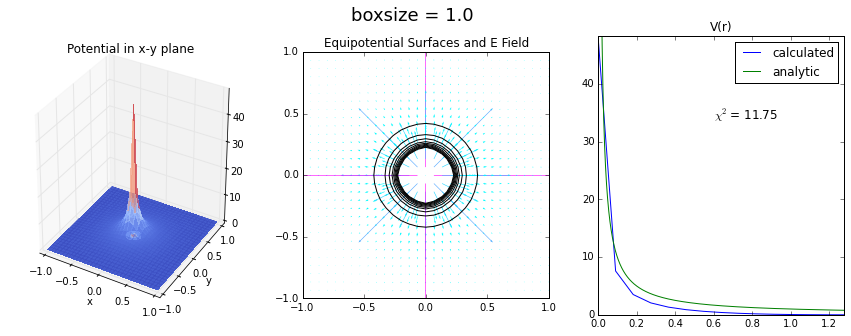

862


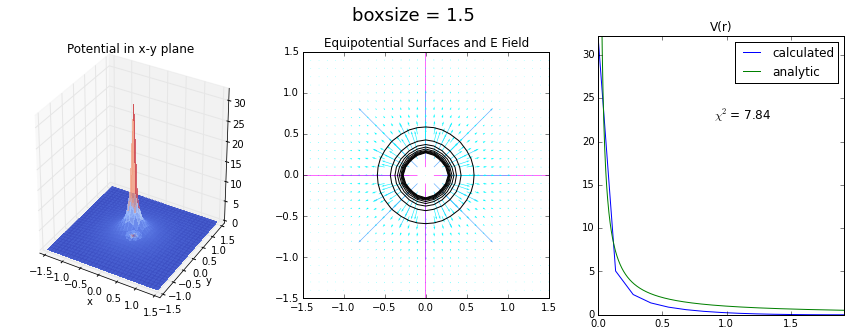

836


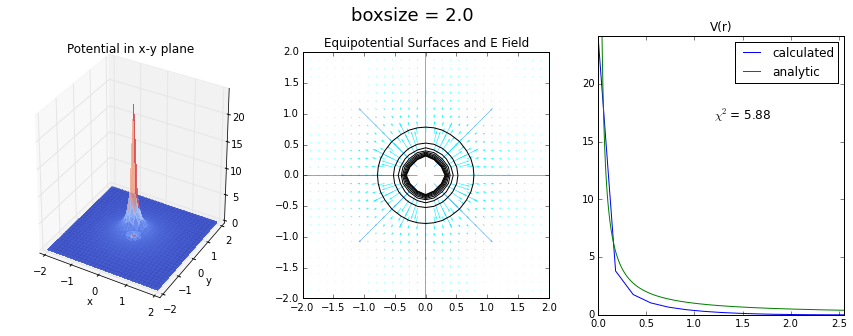

816


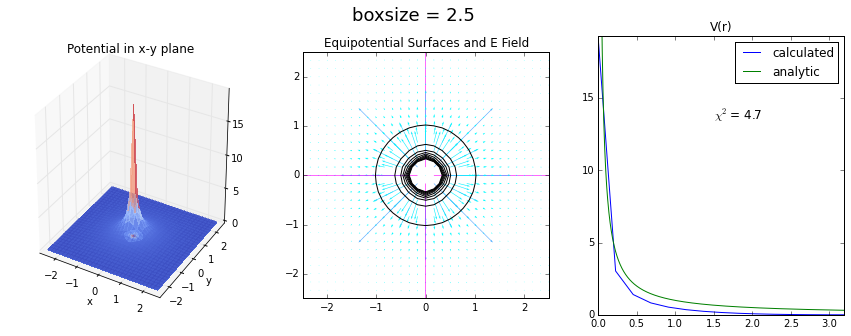

799


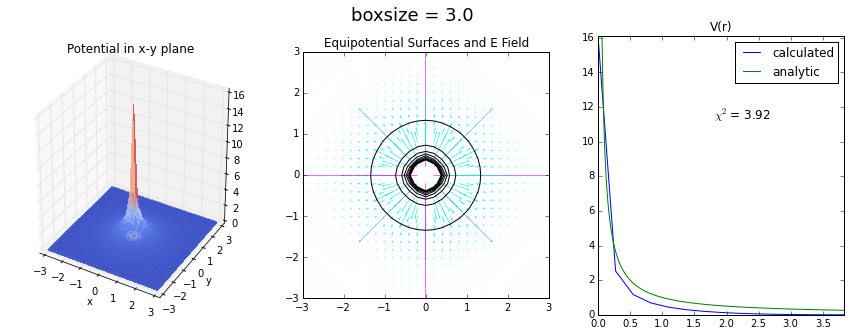

In [57]:
# Solution to problem 3
'''
Modified version of:
Laplace's Equation
Linear Potential in a box
by Dr. Wood

October 2015
James O. Thomas
'''

import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
np.set_printoptions(formatter={'float': '{: 0.1f}'.format})

def relax(V):
    # modified for point charge
    return (V[i-1,j,k]+V[i+1,j,k]+V[i,j-1,k]+V[i,j+1,k]+V[i,j,k-1]+V[i,j,k+1])/6.0 + rho[i,j,k]*dx**2/6

# initialize
tolerance = 1.0e-6 
n = 31
size = np.array([1, 1.5, 2, 2.5, 3])

for boxsize in size:
    dx = (2*boxsize)/n

    # initialize
    delta = 1.0
    V = np.zeros([n,n,n])
    rho = np.zeros([n,n,n])
    # outer surface
    V[:,:,0] = 0.0
    V[:,:,-1] = 0.0
    V[:,0,:] = 0.0
    V[:,-1,:] = 0.0
    V[0,:,:] = 0.0
    V[-1,:,:] = 0.0

    center = int(n/2)
    rho[center,center,center] = 1/dx**3*4*np.pi


    # iterate until all points have reached their 'best' values
    iteration = 0
    while delta > tolerance:
        delta = 0
        for i in range(1,n-1):          # x
            for j in range(1,n-1):      # y
                for k in range(1,n-1):  # z 
                    newVijk = relax(V)
                    delta0 = np.abs(newVijk - V[i,j,k])
                    if delta0 > delta:
                        delta = delta0
                    V[i,j,k] = newVijk
        iteration += 1
    print(iteration)
    x = np.linspace(-boxsize, boxsize, n)
    y = np.linspace(-boxsize, boxsize, n)
    z = np.linspace(-boxsize, boxsize, n)
    
    # get V(r)
    V_keep = np.zeros(int(n/2))
    r = np.zeros(int(n/2))
    for i in range(int(n/2)):
        V_keep[i] = V[center+i,center+i,center+i]
        r[i] = i*dx*np.sqrt(2)
    V_analytic = 1/r
    # compute chi squared, ignore 1st point because of singularity
    chi2 = np.sum((V_keep[1:] - V_analytic[1:])**2/V_analytic[1:])
    
    fig = plt.figure(figsize = (15,5))
    plt.suptitle('boxsize = '+str(boxsize), size = 18)
    
    X,Y = np.meshgrid(x,y)
    V0 = V[:,:,center]
    ax1 = fig.add_subplot(131, projection = '3d')
    ax1.set_title('Potential in x-y plane')
    surf1 = ax1.plot_surface(X,Y,V0, rstride=1, cstride=1, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    cset1 = ax1.contourf(X,Y,V0, zdir = 'Vxy', offset = -0.1, cmap = cm.coolwarm)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    ax2 = fig.add_subplot(133)
    ax2.set_title('V(r)')
    ax2.text(0.6*boxsize, 0.7*max(V_keep), r'$\chi ^2 $= '+str(round(chi2,2)), size = 12)
    ax2.plot(r,V_keep, label = 'calculated')
    r_plot = np.linspace(0.01, np.max(r), 1000)
    ax2.plot(r_plot, 1/r_plot, label = 'analytic')
    ax2.set_xlim(0, np.max(r))
    ax2.set_ylim(0, np.max(V_keep))
    l = ax2.legend(loc = 'upper right')
    ax2.set_xlim(0,max(r))
    ax2.set(aspect = 1)
    
    ax3 = fig.add_subplot(132)
    ax3.set_title('Equipotential Surfaces and E Field')
    X,Y = np.meshgrid(x,y)
    Ey, Ex = np.gradient(-V0)
    mag = np.sqrt(Ey**2 + Ex**2)  # color the E field according to the magnitude of E not V
    q1 = ax3.quiver(X,Y,Ex, Ey, mag, cmap = cm.cool)
    lvls = np.arange(0.1,1.1,0.1)
    lvls = np.log(lvls*np.max(V0))
    cs1 = ax3.contour(X,Y,V0, levels = lvls, colors = 'k')
    #plt.clabel(cs1, fontsize=9, inline=1)
    ax3.set(aspect = 1)
    ax1.set_xlim(-1.05*boxsize, 1.05*boxsize)
    ax1.set_ylim(-1.05*boxsize, 1.05*boxsize)
    
    plt.show()
    

As we can see from the plots. Using a larger box size leads to a lower $\chi ^2$ which indicates the computed potential matches the analytic solution better. It can also be seen that the calculated solution is lower than the analytic solution. This is because we force our calculated solution to go to 0 at the boundaries. However, the analytic solution does not go to 0 until $r=\infty$. 

---
**Problem G1: (Grad Students) Dipole**  

Model a dipole using the code from Problem 3 as a starting point.  To get sufficient resolution you may need to go to $n=41$ or higher.  

iterations =  629


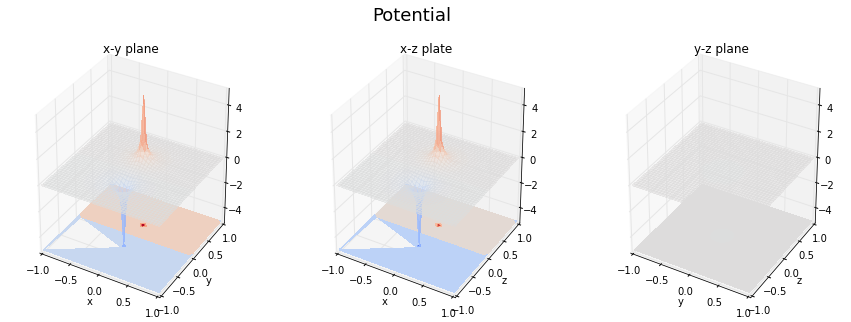

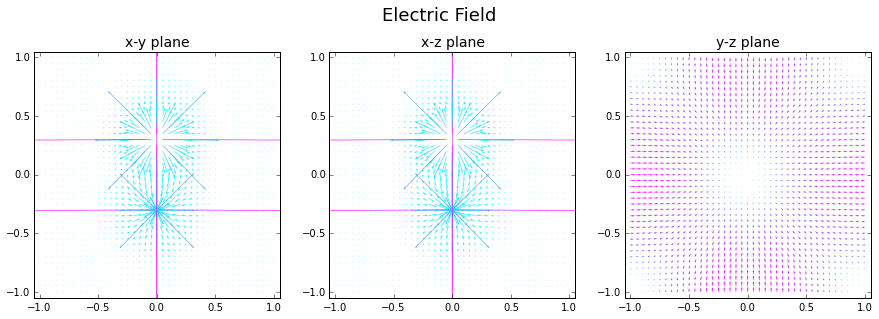

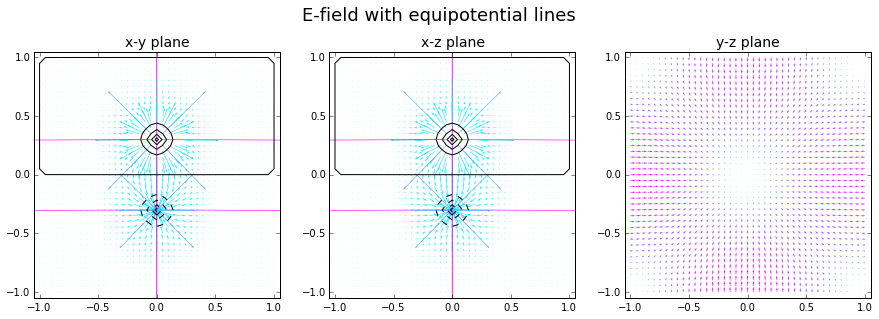

In [68]:
# Solution to problem G1
'''
Modified version of:
Laplace's Equation
Linear Potential in a box
by Dr. Wood

October 2015
James O. Thomas
'''

import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
np.set_printoptions(formatter={'float': '{: 0.1f}'.format})

def relax(V):
    # modified for point charge
    return (V[i-1,j,k]+V[i+1,j,k]+V[i,j-1,k]+V[i,j+1,k]+V[i,j,k-1]+V[i,j,k+1])/6.0 + rho[i,j,k]*dx**2/6

# initialize
tolerance = 1.0e-6
delta = 1.0
n = 41
boxsize = 1
dipole_spacing = 0.01   # as percentage of total box size
dx = (2*boxsize)/n

# initialize
V = np.zeros([n,n,n])
rho = np.zeros([n,n,n])
# outer surface
V[:,:,0] = 0.0
V[:,:,-1] = 0.0
V[:,0,:] = 0.0
V[:,-1,:] = 0.0
V[0,:,:] = 0.0
V[-1,:,:] = 0.0

center = int(n/2)
rho[int(n*(1+s)/2),center,center] = 1/dx**3       # +q charge
rho[int(n*(1-s)/2), center, center] = -1/dx**3    # -q charge

# iterate until all points have reached their 'best' values
iteration = 0
while delta > tolerance:
    delta = 0
    for i in range(1,n-1):          # x
        for j in range(1,n-1):      # y
            for k in range(1,n-1):  # z 
                newVijk = relax(V)
                delta0 = np.abs(newVijk - V[i,j,k])
                if delta0 > delta:
                    delta = delta0
                V[i,j,k] = newVijk
    iteration += 1
    
print('iterations = ', iteration)

# Now we just do a bunch of plotting, all the work is done

x = np.linspace(-boxsize,boxsize,n)
y = np.linspace(-boxsize,boxsize,n)
z = np.linspace(-boxsize,boxsize,n)
maxval = np.max(V)
minval = np.min(V)

fig = plt.figure(figsize = (15,5))
plt.suptitle('Potential', size =18)

Vxy = V[:,:,center]
X,Y = np.meshgrid(x,y)
ax1 = fig.add_subplot(131, projection = '3d')
ax1.set_title('x-y plane')
surf1 = ax1.plot_surface(X,Y,Vxy, rstride=1, cstride=1, alpha=0.5, cmap=cm.coolwarm, 
                         linewidth=0, antialiased=False, vmin = minval, vmax = maxval)
cset1 = ax1.contourf(X,Y,Vxy, zdir = 'Vxy', offset = minval, cmap = cm.coolwarm, vmin = minval, vmax = maxval)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

Vxz = V[:,center,:]
X,Z = np.meshgrid(x,z)
ax2 = fig.add_subplot(1,3,2, projection = '3d')
ax2.set_title('x-z plate')
surf2 = ax2.plot_surface(X,Z,Vxz, rstride=1, cstride=1, alpha=0.5, cmap=cm.coolwarm, 
                         linewidth=0, antialiased=False, vmin = minval, vmax = maxval)
cset2 = ax2.contourf(X,Z,Vxz, zdir = 'Vxz', offset = minval, cmap = cm.coolwarm, vmin = minval, vman = maxval)
ax2.set_xlabel('x')
ax2.set_ylabel('z')

Vyz = V[center,:,:]
Y,Z = np.meshgrid(y,z)
ax3 = fig.add_subplot(1,3,3, projection = '3d')
ax3.set_title('y-z plane')
surf3 = ax3.plot_surface(Y,Z,Vyz, rstride=1, cstride=1, alpha=0.5, cmap=cm.coolwarm, 
                         linewidth=0, antialiased=False, vmin = minval, vmax = maxval)
cset3 = ax3.contourf(Y,Z,Vyz, zdir = 'Vyz', offset = minval, cmap = cm.coolwarm, vmin = minval, vmax = maxval)
ax3.set_zlim(-1.75, 1.75)
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_zlim(minval, maxval)

plt.show()

# Now calculate E field
plt.figure(figsize = (15,5))
plt.suptitle('Electric Field', size = 18)

X,Y = np.meshgrid(x,y)
Ey, Ex = np.gradient(-Vxy)
mag = np.sqrt(Ey**2 + Ex**2)  # color the E field according to the magnitude of E not V
ax1 = plt.subplot(1,3,1)
q1 = ax1.quiver(X,Y,Ex, Ey, mag, cmap = cm.cool)
ax1.set(aspect = 1)
ax1.set_title('x-y plane', size = 14)
ax1.set_xlim(-1.05, 1.05)
ax1.set_ylim(-1.05, 1.05)

X,Z = np.meshgrid(x,y)
Ez, Ex = np.gradient(-Vxz)
mag = np.sqrt(Ez**2 + Ex**2)  # color the E field according to the magnitude of E not V
ax2 = plt.subplot(1,3,2)
q2 = ax2.quiver(X,Z,Ex, Ez, mag, cmap = cm.cool)
ax2.set(aspect = 1)
ax2.set_title('x-z plane', size = 14)
ax2.set_xlim(-1.05, 1.05)
ax2.set_ylim(-1.05, 1.05)

Y,Z = np.meshgrid(y,z)
Ez, Ey = np.gradient(-Vyz)
mag = np.sqrt(Ez**2 + Ey**2)  # color the E field according to the magnitude of E not V
ax3 = plt.subplot(1,3,3)
q3 = ax3.quiver(Y,Z,Ey, Ez, mag, cmap = cm.cool)
ax3.set(aspect = 1)
ax3.set_title('y-z plane', size = 14)
ax3.set_xlim(-1.05, 1.05)
ax3.set_ylim(-1.05, 1.05)

plt.show()

# now plot equipotenital lines with the E field
plt.figure(figsize = (15,5))
plt.suptitle('E-field with equipotential lines', size = 18)

X,Y = np.meshgrid(x,y)
Ey, Ex = np.gradient(-Vxy)
mag = np.sqrt(Ey**2 + Ex**2)  # color the E field according to the magnitude of E not V
ax1 = plt.subplot(1,3,1)
q1 = ax1.quiver(X,Y,Ex, Ey, mag, cmap = cm.cool)
cs1 = ax1.contour(X,Y,Vxy, levels = [-4,-2,-1,-0.5,0,0.5,1,2,4], colors = 'k')
#plt.clabel(cs1, fontsize=9, inline=1)
ax1.set(aspect = 1)
ax1.set_title('x-y plane', size = 14)
ax1.set_xlim(-1.05, 1.05)
ax1.set_ylim(-1.05, 1.05)

X,Z = np.meshgrid(x,y)
Ez, Ex = np.gradient(-Vxz)
mag = np.sqrt(Ez**2 + Ex**2)  # color the E field according to the magnitude of E not V
ax2 = plt.subplot(1,3,2)
q2 = ax2.quiver(X,Z,Ex, Ez, mag, cmap = cm.cool)
cs2 = ax2.contour(X,Z,Vxz, levels = [-4,-2,-1,-0.5,0,0.5,1,2,4], colors = 'k')
#plt.clabel(cs2, fontsize=9, inline=1)
ax2.set(aspect = 1)
ax2.set_title('x-z plane', size = 14)
ax2.set_xlim(-1.05, 1.05)
ax2.set_ylim(-1.05, 1.05)

Y,Z = np.meshgrid(y,z)
Ez, Ey = np.gradient(-Vyz)
mag = np.sqrt(Ez**2 + Ey**2)  # color the E field according to the magnitude of E not V
ax3 = plt.subplot(1,3,3)
q3 = ax3.quiver(Y,Z,Ey, Ez, mag, cmap = cm.cool)
cs3 = ax3.contour(Y,Z,Vyz, levels = [-4,-2,-1,-0.5,0,0.5,1,2,4], colors = 'k')
#plt.clabel(cs3, fontsize=9, inline=1)
ax3.set(aspect = 1)
ax3.set_title('y-z plane', size = 14)
ax3.set_xlim(-1.05, 1.05)
ax3.set_ylim(-1.05, 1.05)

plt.show()

From the plots above we can see that the potential and the field created from a dipole fall off faster than their counterparts for a single point charge. This is what we would expect from Physics 2426. If I remember correctly, the field should fall off as $\frac{1}{r^3}$ , and therefore the potential should go as $\frac{1}{r^2}$.